In [0]:
import tensorflow as tf

import numpy as np
from matplotlib import pyplot as plt


In [60]:
a=tf.constant(2)
b=tf.constant(3)
sess=tf.Session()
sess.run(b)
a1=tf.constant([[3,3]])
a2=tf.constant([[2],[2]])
c=tf.matmul(a1,a2)

with tf.Session() as sess:
  print(c.eval())
  
var1=tf.Variable(3)
var2=tf.Variable(4)
sum=tf.add(var1,var2)
sess= tf.Session() 
sess.run(tf.global_variables_initializer())
sess.run(sum)  
sess.run(var1.assign(123))  
sess.run(var1.assign(123))


x=tf.placeholder(tf.int32,shape=(1,2))
y=tf.constant(12)*x
sess.run(y,feed_dict=({x:[[2,3]]}))

[[12]]


array([[24, 36]], dtype=int32)

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [62]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [63]:
mnist
#mnist has labels and images

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f01ea116278>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f01ea1162e8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f01ea1161d0>)

In [64]:
mnist.train.images.shape

(55000, 784)

In [65]:
mnist.test.images.shape

(10000, 784)

In [66]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

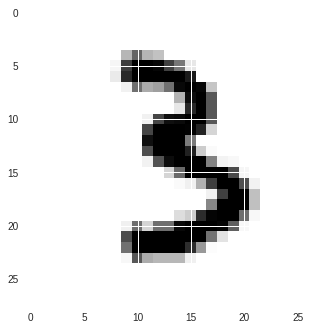

In [67]:
first_image=mnist.train.images[412]
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape(28,28)
plt.imshow(first_image)
plt.show()

In [0]:
#input layer has 784 units
#for output layer   10 units
# unit in hidden layer 1 and 2= 256
#all biases added

In [0]:
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10


weights={
    'hl1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'hl2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'output':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
    
}
bias={
    'hl1':tf.Variable(tf.random_normal([n_hidden_1])),
    'hl2':tf.Variable(tf.random_normal([n_hidden_2])),
    'output':tf.Variable(tf.random_normal([n_classes]))
    
}

In [0]:
def forward_prediction(x,weights,biases):
  inlayer1=tf.add(tf.matmul(x,weights['hl1']),biases['hl1'])
  outlayer1=tf.nn.relu(inlayer1)
  inlayer2=tf.add(tf.matmul(outlayer1,weights['hl2']),biases['hl2'])
  outlayer2=tf.nn.relu(inlayer2)
  output=tf.add(tf.matmul(outlayer2,weights['output']),biases['output'])
  return output


In [0]:
x=tf.placeholder('float',[None,n_input])
y=tf.placeholder(tf.int32,[None,n_classes])
pred=forward_prediction(x,weights,bias)



In [0]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [0]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [0]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [87]:
for i in range(25):
  costnew, n=sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels})
  print(costnew)

59.265427
57.145428
54.995586
52.973988
51.163155
49.582035
48.15595
46.822083
45.509018
44.207382
42.952446
41.80134
40.76945
39.831474
38.934746
38.0219
37.06835
36.099483
35.161076
34.285797
33.501225
32.79812
32.13144
31.487623
30.856936


In [92]:
predns=tf.argmax(pred,1)
truelabels=tf.argmax(y,1)
correct_predictions = tf.equal(predns, truelabels)

predn_eval,labels,correct=sess.run([predns,truelabels,correct_predictions],feed_dict={x:mnist.train.images,y:mnist.train.labels})
predn_eval,labels,correct

(array([7, 3, 9, ..., 5, 6, 8]),
 array([7, 3, 4, ..., 5, 6, 8]),
 array([ True,  True, False, ...,  True,  True,  True]))

In [93]:
correct.sum()

49860